## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
complete_data_df = complete_data_df.sort_values("Drug Regimen")

complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


In [12]:
complete_data_df.drop_duplicates(inplace=True)

In [14]:
complete_data_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary statistics

In [4]:
#DROP DUPLICATE ROWS

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = complete_data_df.groupby("Drug Regimen")


mean_tum_vol = drug_reg["Tumor Volume (mm3)"].mean()
median_tum_vol = drug_reg["Tumor Volume (mm3)"].median()
var_tum_vol = drug_reg["Tumor Volume (mm3)"].var()
std_tum_vol = drug_reg["Tumor Volume (mm3)"].std()
sem_tum_vol = drug_reg["Tumor Volume (mm3)"].sem()

summary_stats_tumor_vol_by_reg_df = pd.DataFrame({"Mean":mean_tum_vol,
                                                 "Median":median_tum_vol,
                                                 "Variance":var_tum_vol,
                                                 "Standard Deviation": std_tum_vol,
                                                 "Standard Error of Means":sem_tum_vol
                                                 })
summary_stats_tumor_vol_by_reg_df = summary_stats_tumor_vol_by_reg_df.reset_index()
summary_stats_tumor_vol_by_reg_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,Standard Error of Means
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

In [16]:
complete_data_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

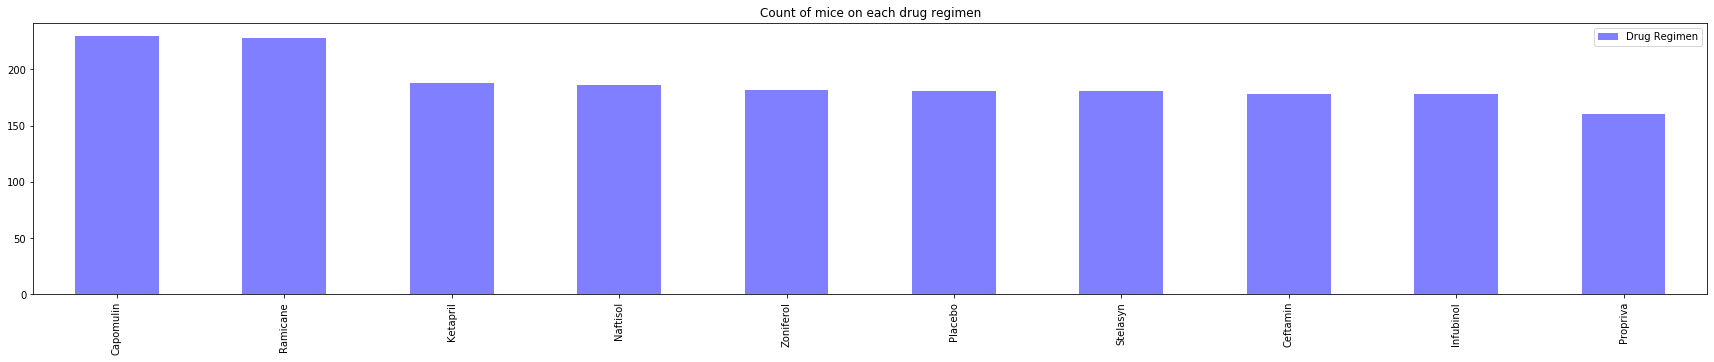

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using panda
y_axis = pd.DataFrame(complete_data_df["Drug Regimen"].value_counts())
y_axis.plot(kind="bar", figsize=(30,5),color='b',alpha=.5,title="Count of mice on each drug regimen")



Text(0.5, 1.0, 'Count of mice on each Drug Regimen')

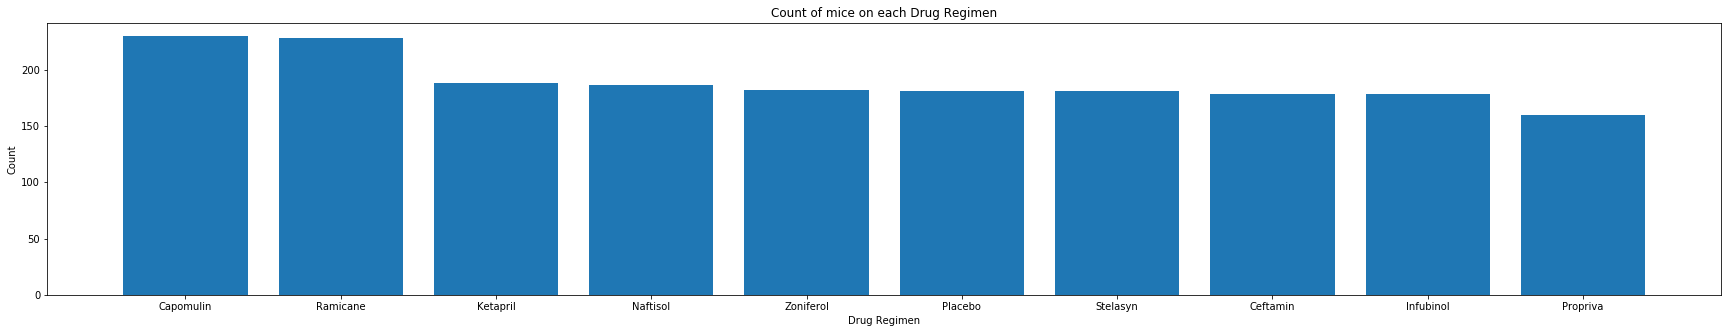

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data = complete_data_df["Drug Regimen"]
y_axis = data.value_counts()
x_axis = y_axis.index
plt.figure(figsize=(30,5))
plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Count of mice on each Drug Regimen")

In [ ]:
y_axis.set_xlabel?

## Pie plots

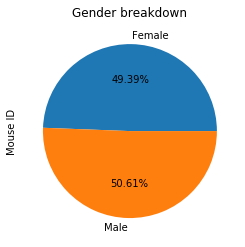

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = complete_data_df.groupby("Sex").count()
gender = gender["Mouse ID"]
gender.plot(kind="pie",title="Gender breakdown",autopct="%.2f%%")



Text(0.5, 1.0, 'Gender breakdown')

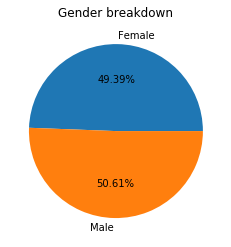

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = complete_data_df.loc[complete_data_df["Sex"]=="Male"]
male_count = (male["Sex"]).count()

female = complete_data_df.loc[complete_data_df["Sex"]=="Female"]
female_count = (female["Sex"]).count()

gender_count = [female_count,male_count]

labels = ["Female","Male"]

plt.pie(gender_count,labels=labels,autopct="%.2f%%")
plt.title("Gender breakdown")

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.





In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
gender.plot?

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen